In [4]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Carregar modelo pré-treinado
model = models.resnet18(pretrained=True)
model.eval()

# Hooks para capturar ativação e gradiente
activations = {}
gradients = {}

def forward_hook(module, input, output):
    activations['value'] = output

def backward_hook(module, grad_input, grad_output):
    gradients['value'] = grad_output[0]

# Registrar hooks na última camada convolucional
target_layer = model.layer4[1].conv2
target_layer.register_forward_hook(forward_hook)
target_layer.register_backward_hook(backward_hook)

# Transformação da imagem
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Carregar imagem
img_path = 'exemplo.jpg'  # Substitua pelo caminho correto
img = Image.open(img_path).convert('RGB')
input_tensor = transform(img).unsqueeze(0)

# Forward pass
output = model(input_tensor)
pred_class = output.argmax().item()

# Backward pass
model.zero_grad()
output[0, pred_class].backward()

# Grad-CAM
grad = gradients['value']
act = activations['value']
weights = grad.mean(dim=[2, 3], keepdim=True)
cam = (weights * act).sum(dim=1).squeeze()
cam = torch.relu(cam)
cam = cam - cam.min()
cam = cam / cam.max()
cam_np = cam.cpu().numpy()
cam_np = cv2.resize(cam_np, (224, 224))
heatmap = cv2.applyColorMap(np.uint8(255 * cam_np), cv2.COLORMAP_JET)

# Sobrepor na imagem original
img_np = np.array(img.resize((224, 224)))
overlay = cv2.addWeighted(img_np, 0.5, heatmap, 0.5, 0)

# Mostrar resultado
plt.figure(figsize=(8, 8))
plt.imshow(overlay)
plt.title(f'Grad-CAM - Classe Predita: {pred_class}')
plt.axis('off')
plt.show()


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


FileNotFoundError: [Errno 2] No such file or directory: 'exemplo.jpg'

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Saving Gerar no colab.jpg to Gerar no colab.jpg


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1830: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


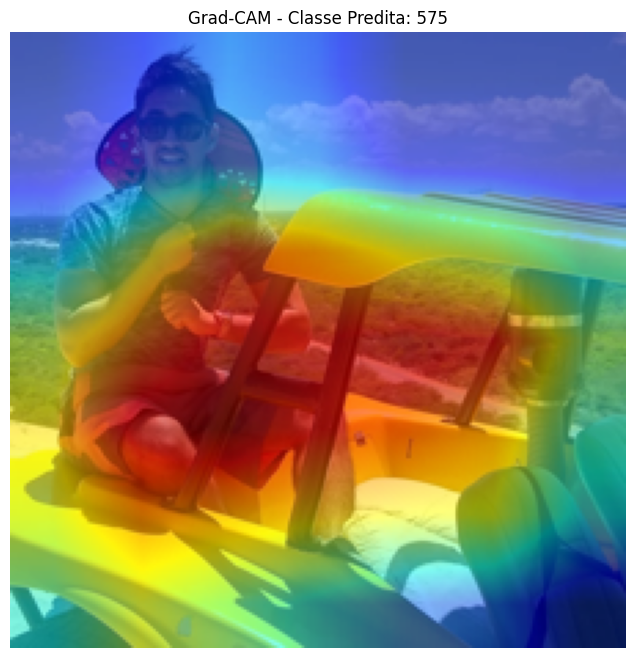

In [5]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab import files # Import files module

# Carregar modelo pré-treinado
model = models.resnet18(pretrained=True)
model.eval()

# Hooks para capturar ativação e gradiente
activations = {}
gradients = {}

def forward_hook(module, input, output):
    activations['value'] = output

def backward_hook(module, grad_input, grad_output):
    gradients['value'] = grad_output[0]

# Registrar hooks na última camada convolucional
target_layer = model.layer4[1].conv2
target_layer.register_forward_hook(forward_hook)
target_layer.register_backward_hook(backward_hook)

# Transformação da imagem
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Carregar imagem
# Use files.upload() to upload an image
uploaded = files.upload()

# Assuming only one file is uploaded, get the filename
img_path = list(uploaded.keys())[0]

img = Image.open(img_path).convert('RGB')
input_tensor = transform(img).unsqueeze(0)

# Forward pass
output = model(input_tensor)
pred_class = output.argmax().item()

# Backward pass
model.zero_grad()
output[0, pred_class].backward()

# Grad-CAM
grad = gradients['value']
act = activations['value']
weights = grad.mean(dim=[2, 3], keepdim=True)
cam = (weights * act).sum(dim=1).squeeze()
cam = torch.relu(cam)
cam = cam - cam.min()
cam = cam / cam.max()
cam_np = cam.detach().cpu().numpy()
cam_np = cv2.resize(cam_np, (224, 224))

# Apply colormap to the single-channel heatmap
heatmap = cv2.applyColorMap(np.uint8(255 * cam_np), cv2.COLORMAP_JET)

# Sobrepor na imagem original
img_np = np.array(img.resize((224, 224)))

# Ensure the original image is in BGR format for cv2.addWeighted
img_np_bgr = cv2.cvtColor(img_np, cv2.COLOR_RGB2BGR)

overlay = cv2.addWeighted(img_np_bgr, 0.5, heatmap, 0.5, 0)

# Convert back to RGB for displaying with matplotlib
overlay_rgb = cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB)


# Mostrar resultado
plt.figure(figsize=(8, 8))
plt.imshow(overlay_rgb)
plt.title(f'Grad-CAM - Classe Predita: {pred_class}')
plt.axis('off')
plt.show()